In [ ]:
Author: Swarupa Aphale

In [ ]:
Data Science & Business Analytics Intern

In [ ]:
GRIP @ The Sparks Foundation

In [ ]:
Task 1: Prediction using Supervised ML

In [ ]:
Aim: 1) To predict the percentage of an student based on the no. of study hours
     2) What will be predicted score if a student studies for 9.25 hrs/day?

## Step 1: Import Python Libraries

In [1]:
import pandas as pd
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

## Step 2: Loading of Dataset

In [2]:
df = pd.read_csv('task_1_tsf.csv')
df.head()

,Hours_of_Study,Percentage
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Data Sorting
df_n = df.sort_values(by = 'Hours_of_Study',ignore_index=True)
df_n.head()

,Hours_of_Study,Percentage
0,1.1,17
1,1.5,20
2,1.9,24
3,2.5,21
4,2.5,30


## Step 3: Data Visualization

<AxesSubplot:xlabel='Hours_of_Study', ylabel='Percentage'>

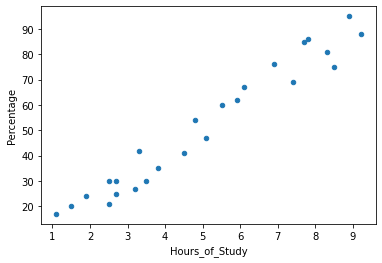

In [4]:
df_n.plot.scatter(x = 'Hours_of_Study', y = 'Percentage')

In [5]:
df_n.corr().style.background_gradient('Blues')

,Hours_of_Study,Percentage
Hours_of_Study,1.000000,0.976191
Percentage,0.976191,1.000000


### From Heatmap, we get information that, 'Hours of Study' & 'Percentage' have higher corelation like 0.9. Also from Scatter plot, we can say that, there is a linear relationship between 'Percentage' and 'Hours of Study'. Hence we can apply Simple Linear Regression on this dataset.

## Step 4: Perform Simple Linear Regression Algorithm

##### Here, 'Hours_of_Study' is the independent variable (plotted on X-axis) and 'Percentage' is dependent variable (plotted on Y-axis)

In [6]:
X = df_n[['Hours_of_Study']]
X[:3]

,Hours_of_Study
0,1.1
1,1.5
2,1.9


In [7]:
y = df_n.Percentage
y[:3]

0    17
1    20
2    24
Name: Percentage, dtype: int64

##### For ML, we use sklearn library also known as scikit learn

In [8]:
# call the algorithm/Create an object of algorithm
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model

LinearRegression()

##### Perform model training

In [10]:
model.fit(X,y)

LinearRegression()

##### Perform model testing

In [11]:
# model testing
model.predict([[9.25]])

array([92.90985477])

##### So, 92.90% will be the predicted score if a student studies for 9.25 hrs/day.  

In [12]:
X.min(),X.max()

(Hours_of_Study    1.1
 dtype: float64,
 Hours_of_Study    9.2
 dtype: float64)

In [13]:
model.predict([[0]])

array([2.48367341])

In [14]:
model.predict([[9.8]])

array([98.28654664])

## Step 5: Perform Predictions on test set

In [15]:
# input test data
test = df_n.sample(10)
test[:3]

,Hours_of_Study,Percentage
21,8.3,81
8,3.3,42
20,7.8,86


In [16]:
test_input = test[['Hours_of_Study']]
test_input

,Hours_of_Study
21,8.3
8,3.3
20,7.8
9,3.5
16,6.1
3,2.5
19,7.7
18,7.4
13,5.1
5,2.7


In [17]:
# Predict on above input
predicted = model.predict(test_input)
predicted

array([83.62284155, 34.74382459, 78.73493985, 36.69898527, 62.11607409,
       26.92318188, 77.75735951, 74.8246185 , 52.3402707 , 28.87834256])

In [18]:
new_predicted = model.predict(df_n[['Hours_of_Study']])
new_predicted

array([13.23705714, 17.14737849, 21.05769985, 26.92318188, 26.92318188,
       28.87834256, 28.87834256, 33.76624426, 34.74382459, 36.69898527,
       39.63172629, 46.47478866, 49.40752968, 52.3402707 , 56.25059205,
       60.16091341, 62.11607409, 69.9367168 , 74.8246185 , 77.75735951,
       78.73493985, 83.62284155, 85.57800223, 89.48832358, 92.4210646 ])

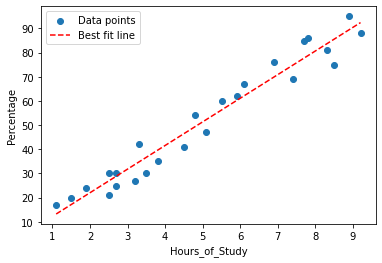

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,y,label='Data points')
plt.plot(X.values,new_predicted,'--r',label='Best fit line')
plt.xlabel('Hours_of_Study')
plt.ylabel('Percentage')
plt.legend()

In [20]:
# Calculate Error
# Error = Actual - Predicted

In [21]:
test['Predicted_Perc'] = predicted
test

,Hours_of_Study,Percentage,Predicted_Perc
21,8.3,81,83.622842
8,3.3,42,34.743825
20,7.8,86,78.734940
9,3.5,30,36.698985
16,6.1,67,62.116074
3,2.5,21,26.923182
19,7.7,85,77.757360
18,7.4,69,74.824618
13,5.1,47,52.340271
5,2.7,30,28.878343


In [22]:
test['Predicted_Perc'] = round(test.Predicted_Perc,2)
test

,Hours_of_Study,Percentage,Predicted_Perc
21,8.3,81,83.62
8,3.3,42,34.74
20,7.8,86,78.73
9,3.5,30,36.70
16,6.1,67,62.12
3,2.5,21,26.92
19,7.7,85,77.76
18,7.4,69,74.82
13,5.1,47,52.34
5,2.7,30,28.88


In [23]:
# add new coloumn of error
test['error'] = test.Percentage - test.Predicted_Perc
test

,Hours_of_Study,Percentage,Predicted_Perc,error
21,8.3,81,83.62,-2.62
8,3.3,42,34.74,7.26
20,7.8,86,78.73,7.27
9,3.5,30,36.70,-6.70
16,6.1,67,62.12,4.88
3,2.5,21,26.92,-5.92
19,7.7,85,77.76,7.24
18,7.4,69,74.82,-5.82
13,5.1,47,52.34,-5.34
5,2.7,30,28.88,1.12


## Step 6: Perform Evalution Metrics using sklearn library

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
mean_absolute_error(test.Percentage,test.Predicted_Perc)

5.417

##### Mean Absolute Error (MAE) is the arithmetic average of absolute errors. The lower the MAE, the higher the accuracy of a model. Here also, we are getting lower value of MAE, which means model accuracy is high. 

In [26]:
mean_squared_error(test.Percentage,test.Predicted_Perc)

33.22356999999999

##### Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero.There is no correct value for MSE. But the lower the value the better and 0 means the model is perfect. Here, we are getting comparatively low value of MSE. 

In [27]:
# Model accuracy
r2_score(test.Percentage,test.Predicted_Perc)*100

93.96987621605925

##### R-squared shows how well the data fit the regression model i.e.the goodness of fit.It always ranges between 0 & 1. Here, we are getting higher value of R-squared, which is a decent value.

In [28]:
# Data accuracy
model.score(X,y)*100

95.29481969048355

In [29]:
model.score(test[['Hours_of_Study']],test.Predicted_Perc)*100

99.99999770316612

##### Conclusion

##### Successfully completed task 1 i.e. Prediction using Supervised ML. And looking at redults, we can say that overall performance of model is good. And predicted score for a student who studies 9.25 hrs/day is 92.90%.

##### Thank you!